In [103]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


- It contains value- and equal-weighted returns for 48 industry portfolios.
- The portfolios are constructed at the end of June.
- The annual returns are from January to December.
- Missing data are indicated by -99.99 or -999.

### Data Import

In [104]:
df_raw = pd.read_csv('48_Industry_Portfolios_Daily.csv', skiprows=range(0,9))
df_raw.drop(axis=0, labels=range(25292,len(df_raw)), inplace=True)
df_raw

C:\Users\seanl\AppData\Local\Temp\ipykernel_16808\4263627443.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv('48_Industry_Portfolios_Daily.csv', skiprows=range(0,9))


,Unnamed: 0,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
0,19260701,0.56,-0.07,-99.99,-1.39,0.0,-1.44,0.62,-1.27,-0.9,...,-0.93,0.14,2.77,-0.02,0.27,0.59,0.47,0.81,0.57,-1.66
1,19260702,0.29,0.06,-99.99,0.78,0.7,1.46,0.03,0.0,-0.34,...,1.07,0.07,0.0,0.01,-0.1,1.04,-0.03,-0.61,-1.03,3.09
2,19260706,-0.33,0.18,-99.99,-1.74,0.5,-0.96,-0.06,4.27,-1.2,...,0.73,-0.2,0.77,-0.22,-0.67,0.45,0.31,-0.72,0.62,1.41
3,19260707,3.57,-0.15,-99.99,-1.73,-0.12,-0.49,-0.06,-4.1,-0.22,...,2.22,0.18,-3.21,-0.57,-1.08,-1.09,0.21,0.07,0.17,0.62
4,19260708,0.3,1.12,-99.99,-0.15,0.3,-0.49,0.24,0.0,-0.01,...,-0.39,0.46,-1.1,-0.38,0.33,0.99,-0.88,-0.36,-1.1,0.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25287,20220725,2.69,0.98,0.99,0.09,0.53,-1.31,-0.39,0.34,0.28,...,0.28,0.60,0.59,-0.69,-1.08,0.79,1.30,0.52,0.31,0.58
25288,20220726,-0.28,0.69,1.36,0.92,0.71,-3.67,-2.31,-0.51,-0.49,...,-0.53,-1.76,-0.58,-4.50,-0.09,-1.55,0.03,-1.88,-1.79,-0.26
25289,20220727,1.88,-0.07,0.04,0.28,0.19,3.99,4.16,3.22,1.27,...,2.23,1.78,1.49,3.24,3.54,1.36,0.51,2.41,1.88,1.51
25290,20220728,0.50,1.63,1.68,1.69,0.10,1.51,0.25,0.65,1.78,...,1.27,1.81,1.58,1.39,1.66,0.12,0.39,1.27,3.13,2.20


### Data Cleaning

In [105]:
df = df_raw.copy()
df = df.apply(pd.to_numeric)
df.rename(columns={'Unnamed: 0':'Date'}, inplace=True)

tmp = df.columns
tmp = list(tmp)

out = []
for i in tmp:
    out.append(i.replace(' ', ''))

df.columns = out
#df.info()

In [106]:
#making the date column into actual date 
df['Date'] = df['Date'].astype(str)
df['Date'] = df['Date'].apply(lambda x: (x[:4] + '-' + x[4:6] + '-' + x[6:]))
df['Date'] = pd.to_datetime(df['Date'])
df.head()


,Date,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
0,1926-07-01,0.56,-0.07,-99.99,-1.39,0.00,-1.44,0.62,-1.27,-0.90,...,-0.93,0.14,2.77,-0.02,0.27,0.59,0.47,0.81,0.57,-1.66
1,1926-07-02,0.29,0.06,-99.99,0.78,0.70,1.46,0.03,0.00,-0.34,...,1.07,0.07,0.00,0.01,-0.10,1.04,-0.03,-0.61,-1.03,3.09
2,1926-07-06,-0.33,0.18,-99.99,-1.74,0.50,-0.96,-0.06,4.27,-1.20,...,0.73,-0.20,0.77,-0.22,-0.67,0.45,0.31,-0.72,0.62,1.41
3,1926-07-07,3.57,-0.15,-99.99,-1.73,-0.12,-0.49,-0.06,-4.10,-0.22,...,2.22,0.18,-3.21,-0.57,-1.08,-1.09,0.21,0.07,0.17,0.62
4,1926-07-08,0.30,1.12,-99.99,-0.15,0.30,-0.49,0.24,0.00,-0.01,...,-0.39,0.46,-1.10,-0.38,0.33,0.99,-0.88,-0.36,-1.10,0.98


## Split data 

In [107]:
from sklearn.linear_model import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.metrics import *

In [112]:
# selecting only the most recent 63 days 
date = '2022-01-03'
no_obj = 63
date_i = df[df['Date'] == date].index[0]

q1 = df.copy()
q1 = q1.iloc[date_i-63:date_i,:]
q1.head()

,Date,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
25085,2021-10-04,-2.01,0.10,-0.39,-0.35,0.57,-3.49,-1.91,-1.11,-0.66,...,0.20,-0.48,-0.43,-1.83,-0.97,-0.80,-1.01,-2.60,-1.80,-0.78
25086,2021-10-05,1.91,0.75,0.51,0.36,-0.13,1.07,2.83,0.94,0.48,...,1.39,1.24,0.48,0.66,0.36,1.07,1.56,0.99,2.41,1.10
25087,2021-10-06,-2.85,1.00,1.03,1.84,0.38,1.78,0.11,-0.08,0.88,...,0.23,1.05,-0.71,0.57,0.50,0.31,0.34,-1.41,0.13,0.54
25088,2021-10-07,1.04,-0.07,0.36,1.08,-0.63,2.05,-0.17,1.80,0.69,...,0.51,0.00,1.73,1.40,0.76,0.71,1.56,1.35,1.01,1.17
25089,2021-10-08,0.48,-0.48,0.09,-0.01,0.00,-1.04,-0.31,0.08,-0.55,...,-1.12,0.48,-0.01,-0.36,-0.60,0.37,0.63,-1.13,0.67,0.08


INDUSTRIES
- Trans, Hshld, Guns, LabEq, Fin, Hlth

In [110]:
# select the 6 industries that we want 
q1 = q1[['Trans', 'Hshld', 'Guns', 'LabEq', 'Fin', 'Hlth']]
q1.head()

,Trans,Hshld,Guns,LabEq,Fin,Hlth
25085,-0.48,-0.66,-1.16,-1.58,-1.80,-2.02
25086,1.24,0.48,0.34,0.68,2.41,-0.13
25087,1.05,0.88,0.55,0.18,0.13,-0.81
25088,0.00,0.69,0.73,1.18,1.01,1.08
25089,0.48,-0.55,0.21,-0.57,0.67,-1.45


In [113]:
# FOR TESTING
q1 = q1[['Agric', 'Food', 'Soda', 'Beer', 'Smoke', 'Toys']]
q1.head()

,Agric,Food,Soda,Beer,Smoke,Toys
25085,-2.01,0.10,-0.39,-0.35,0.57,-3.49
25086,1.91,0.75,0.51,0.36,-0.13,1.07
25087,-2.85,1.00,1.03,1.84,0.38,1.78
25088,1.04,-0.07,0.36,1.08,-0.63,2.05
25089,0.48,-0.48,0.09,-0.01,0.00,-1.04


In [114]:
# split the data
R_train, R_test = train_test_split(q1)


In [115]:
# calculate demeaned R 
sc = StandardScaler(with_std = False)
R_train[R_train.columns] = sc.fit_transform(R_train[R_train.columns])
R_test[R_test.columns] = sc.fit_transform(R_test[R_test.columns])


In [116]:
# calculate the y

#Specify array_len!
arr_len = 6

eq_w = np.full(
    shape = arr_len,
    fill_value = 1/arr_len
)


y_train = np.dot(R_train, eq_w)
y_test = np.dot(R_test, eq_w)


'''
print('Equal weight portfolio: {}'.format(eq_w))
print('\n')
print('y_train: {}'.format(y_train))
print('\n')
print('y_test: {}'.format(y_test))
'''

"\nprint('Equal weight portfolio: {}'.format(eq_w))\nprint('\n')\nprint('y_train: {}'.format(y_train))\nprint('\n')\nprint('y_test: {}'.format(y_test))\n"

In [117]:
# calculate X

#N matrix 
tmp1 = np.identity((arr_len-1), dtype='int64')
tmp2 = -np.ones((arr_len-1), dtype='int64')
N = np.append(tmp1,[tmp2], axis=0)

X_train = np.dot(R_train, N)
X_test = np.dot(R_test, N)

'''
print('N matrix: {}'.format(N))
print('\n')
print('X_train: {}'.format(X_train))
print('\n')
print('X_test: {}'.format(X_test))
'''


"\nprint('N matrix: {}'.format(N))\nprint('\n')\nprint('X_train: {}'.format(X_train))\nprint('\n')\nprint('X_test: {}'.format(X_test))\n"

# Linear regression

In [118]:
reg = LinearRegression(fit_intercept = False)
reg.fit(X_train, y_train)

train_r2 = reg.score(X_train, y_train)
train_mse = mean_squared_error(y_train, ridge.predict(X_train))

test_r2 = reg.score(X_test, y_test)
test_mse = mean_squared_error(y_test, ridge.predict(X_test))

beta = reg.coef_
w = eq_w - np.dot(N,beta)

print(train_r2)
print(train_mse)

print(test_r2)
print(test_mse)

print(beta)
print(w)

0.15479530157578036
0.4534939403564911
0.22314187016090914
0.5310969028522812
[ 0.16337789  0.02353041  0.01203539 -0.18866713 -0.04406002]
[0.00328878 0.14313625 0.15463127 0.3553338  0.21072669 0.13288321]


# How the value of lambda affects r^2 

## Ridge

In [149]:
# range of alphas to try (need to do a bit of trial and error)
alpha_vec = np.logspace(-8,0,100)
print(alpha_vec)

# results list 
train_r2 = []
train_mse = []
coeff_dict = {}

test_r2 = []
test_mse = []

# iterate over all alphas in range
for cur_alpha in alpha_vec:
    # Create the Ridge object and fit
    ridge = Ridge(cur_alpha)
    ridge.fit(X_train, y_train)
    
    # Training
    train_r2.append(ridge.score(X_train, y_train))
    train_mse.append(mean_squared_error(y_train, ridge.predict(X_train)))
    coeff_dict[cur_alpha] = ridge.coef_
    
    # Test 
    test_r2.append(ridge.score(X_test, y_test))
    test_mse.append(mean_squared_error(y_test, ridge.predict(X_test)))
    
print(train_r2)
    

[1.00000000e-08 1.20450354e-08 1.45082878e-08 1.74752840e-08
 2.10490414e-08 2.53536449e-08 3.05385551e-08 3.67837977e-08
 4.43062146e-08 5.33669923e-08 6.42807312e-08 7.74263683e-08
 9.32603347e-08 1.12332403e-07 1.35304777e-07 1.62975083e-07
 1.96304065e-07 2.36448941e-07 2.84803587e-07 3.43046929e-07
 4.13201240e-07 4.97702356e-07 5.99484250e-07 7.22080902e-07
 8.69749003e-07 1.04761575e-06 1.26185688e-06 1.51991108e-06
 1.83073828e-06 2.20513074e-06 2.65608778e-06 3.19926714e-06
 3.85352859e-06 4.64158883e-06 5.59081018e-06 6.73415066e-06
 8.11130831e-06 9.77009957e-06 1.17681195e-05 1.41747416e-05
 1.70735265e-05 2.05651231e-05 2.47707636e-05 2.98364724e-05
 3.59381366e-05 4.32876128e-05 5.21400829e-05 6.28029144e-05
 7.56463328e-05 9.11162756e-05 1.09749877e-04 1.32194115e-04
 1.59228279e-04 1.91791026e-04 2.31012970e-04 2.78255940e-04
 3.35160265e-04 4.03701726e-04 4.86260158e-04 5.85702082e-04
 7.05480231e-04 8.49753436e-04 1.02353102e-03 1.23284674e-03
 1.48496826e-03 1.788649

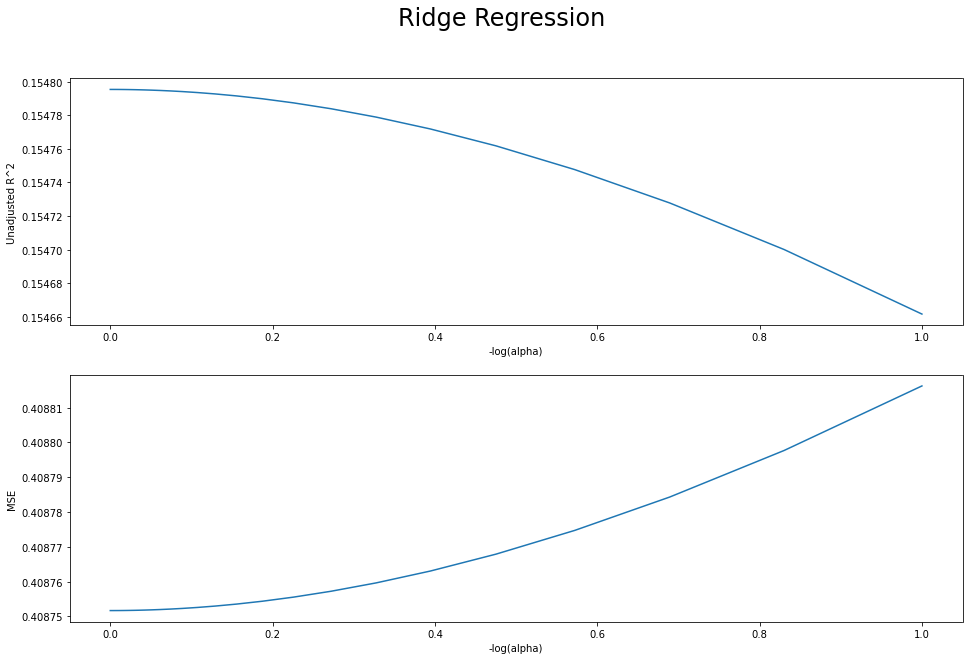

In [150]:
fig, axs = plt.subplots(nrows=2, figsize=(16,10))
sns.lineplot(x=alpha_vec, y=np.array(train_r2), ax=axs[0])
axs[0].set(xlabel='-log(alpha)', ylabel='Unadjusted R^2')

sns.lineplot(x=alpha_vec, y=np.array(train_mse), ax=axs[1])
axs[1].set(xlabel='-log(alpha)', ylabel='MSE')

fig.suptitle('Ridge Regression', fontsize = 24)

plt.show()

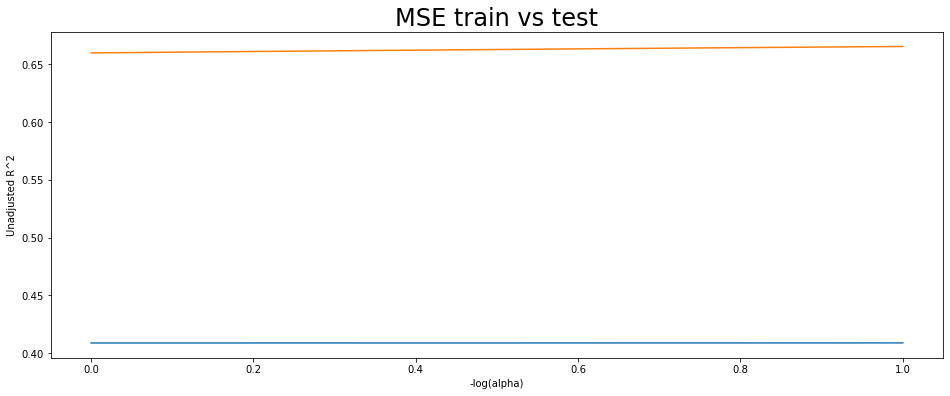

In [151]:
plt.figure(figsize=(16,6))
fig1 = sns.lineplot(x=alpha_vec, y=np.array(train_mse))
fig1 = sns.lineplot(x=alpha_vec, y=np.array(test_mse))
fig1.set(xlabel='-log(alpha)', ylabel='Unadjusted R^2')
plt.title('MSE train vs test', fontsize = 24)

plt.show()

## LASSO 

In [152]:
# range of alphas to try (need to do a bit of trial and error)
alpha_vec = np.logspace(-8,0,100)

# results list 
train_r2 = []
train_mse = []
coeff_dict = {}

test_r2 = []
test_mse = []


# iterate over all alphas in range
for cur_alpha in alpha_vec:
    # Create the Lasso object and fit
    lasso = Lasso(cur_alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    
    # Training
    train_r2.append(lasso.score(X_train, y_train))
    train_mse.append(mean_squared_error(y_train, lasso.predict(X_train)))
    coeff_dict[cur_alpha] = ridge.coef_
    
    # Test 
    test_r2.append(lasso.score(X_test, y_test))
    test_mse.append(mean_squared_error(y_test, lasso.predict(X_test)))


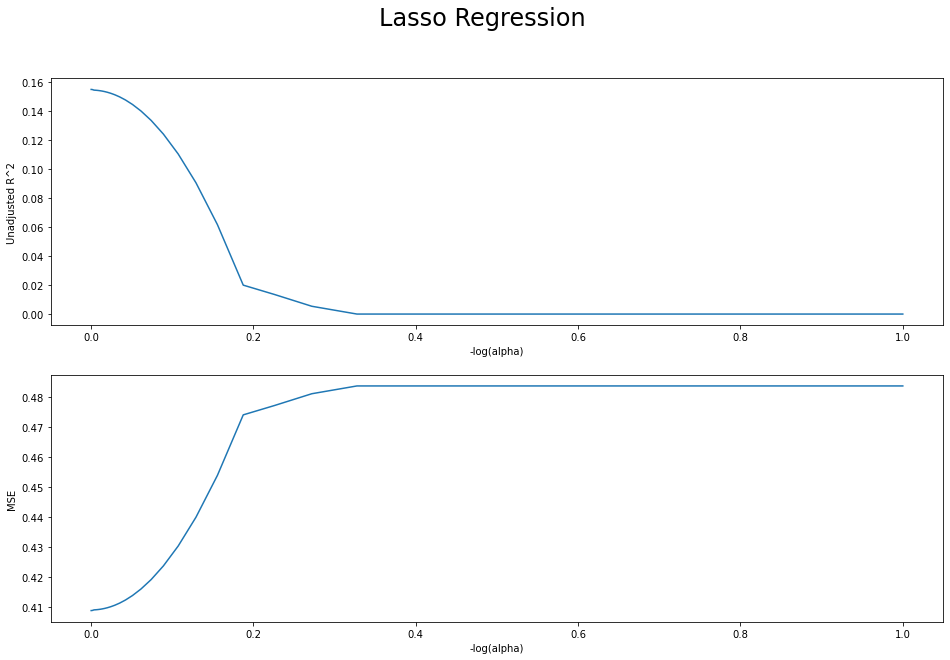

In [153]:
fig, axs = plt.subplots(nrows=2, figsize=(16,10))
sns.lineplot(x=alpha_vec, y=np.array(train_r2), ax=axs[0])
axs[0].set(xlabel='-log(alpha)', ylabel='Unadjusted R^2')

sns.lineplot(x=alpha_vec, y=np.array(train_mse), ax=axs[1])
axs[1].set(xlabel='-log(alpha)', ylabel='MSE')

fig.suptitle('Lasso Regression', fontsize = 24)

plt.show()

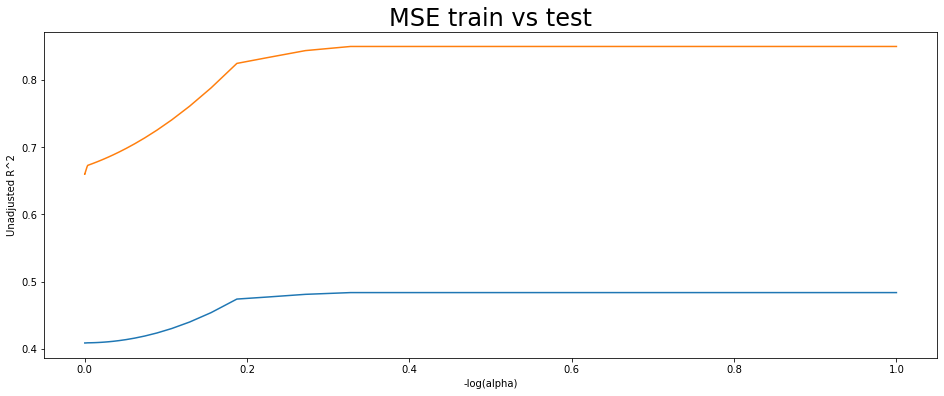

In [154]:
plt.figure(figsize=(16,6))
fig1 = sns.lineplot(x=alpha_vec, y=np.array(train_mse))
fig1 = sns.lineplot(x=alpha_vec, y=np.array(test_mse))
fig1.set(xlabel='-log(alpha)', ylabel='Unadjusted R^2')
plt.title('MSE train vs test', fontsize = 24)

plt.show()


In [100]:
# then do cross validation to show over fitting



